In [1]:
### ВНИМАНИЕ на данны момент 2.0.1 корректно не работает с pandas_datareader
# conda install pandas==1.5.3

In [2]:
import pandas as pd
import pandas_datareader.data as web
import pandas_datareader as pdr
import seaborn as sns
# conda update -n base -c defaults conda

import pandas as pd 
import datetime
import yfinance as yf
import numpy as np

print(pd.__version__)

1.5.3


In [3]:
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)

f = web.get_data_moex('USD000UTSTOM', start=start, end=end)
f.head()

/var/folders/yr/lbn9q2ts2kv3nbc69_l3nscm0000gn/T/ipykernel_12814/2007868159.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f = web.get_data_moex('USD000UTSTOM', start=start, end=end)


,BOARDID,CLOSE,HIGH,LOW,NUMTRADES,OPEN,SECID,SHORTNAME,VOLRUR,WAPRICE
TRADEDATE,,,,,,,,,,
2022-01-03,CETS,74.5425,75.1975,74.1750,25411,74.680,USD000UTSTOM,USDRUB_TOM,6.761404e+10,74.5598
2022-01-04,CETS,75.3625,75.5850,74.4375,36221,74.550,USD000UTSTOM,USDRUB_TOM,9.649432e+10,75.1690
2022-01-05,CETS,76.8000,76.9000,75.3150,50372,75.315,USD000UTSTOM,USDRUB_TOM,1.301021e+11,75.9368
2022-01-06,CETS,76.3175,77.3450,76.0100,65332,76.800,USD000UTSTOM,USDRUB_TOM,1.960930e+11,76.6483
2022-01-07,CETS,75.7500,76.5300,75.0900,32552,76.320,USD000UTSTOM,USDRUB_TOM,1.122452e+11,75.6455


In [4]:
sber=web.DataReader('sber', 'moex', start='2017-01-01', end='2017-12-31')
sber.head()

/var/folders/yr/lbn9q2ts2kv3nbc69_l3nscm0000gn/T/ipykernel_12814/344903933.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sber=web.DataReader('sber', 'moex', start='2017-01-01', end='2017-12-31')


,ACCINT,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,...,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDATWAP,YIELDCLOSE,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,180.12,9.609078e+09,NaN,NaN,TQBR,NaN,NaN,NaN,180.12,...,NaN,NaN,9.609078e+09,53890400.0,178.25,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,175.95,7.305516e+09,NaN,NaN,TQBR,NaN,NaN,NaN,175.95,...,NaN,NaN,7.305516e+09,41400710.0,176.50,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,171.90,6.109243e+09,NaN,NaN,TQBR,NaN,NaN,NaN,171.90,...,NaN,NaN,6.109243e+09,35093040.0,174.13,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,170.69,6.065098e+09,NaN,NaN,TQBR,NaN,NaN,NaN,170.69,...,NaN,NaN,6.065098e+09,35415590.0,171.28,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,168.35,5.977865e+09,NaN,NaN,TQBR,NaN,NaN,NaN,168.35,...,NaN,NaN,5.977865e+09,35187380.0,169.90,NaN,NaN,NaN,NaN,NaN


In [5]:
f = pdr.moex.MoexReader('SBER', '2020-07-02', '2020-07-03').read_all_boards()
f.head()

,ACCINT,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,...,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDATWAP,YIELDCLOSE,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2020-07-02,NaN,NaN,NaN,NaN,NaN,SOTC,NaN,NaN,NaN,NaN,...,NaN,common_share,1.665496e+09,8006565.0,208.01631,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,NaN,SOTC,NaN,NaN,NaN,NaN,...,NaN,common_share,6.954577e+08,3312340.0,209.95965,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,PTEQ,NaN,NaN,NaN,210.00,...,NaN,NaN,1.902915e+08,914392.0,208.11000,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,NaN,PTEQ,NaN,NaN,NaN,210.08,...,NaN,NaN,1.867183e+08,888958.0,210.32000,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,0.0,MXBD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
f.BOARDID.unique()

array(['SOTC', 'PTEQ', 'MXBD', 'RPMO', 'EQRP', 'PSRD', 'PSRP', 'SMAL',
       'TQBR'], dtype=object)

In [7]:
print(sber.columns)

Index(['ACCINT', 'ADMITTEDQUOTE', 'ADMITTEDVALUE', 'BEICLOSE', 'BID',
       'BOARDID', 'BOARDNAME', 'BUYBACKDATE', 'CBRCLOSE', 'CLOSE',
       'CLOSEAUCTIONPRICE', 'CLOSEPERIOD', 'CLOSEVAL', 'COUPONPERCENT',
       'COUPONVALUE', 'CURRENCYID', 'DAILYCAPITALIZATION', 'DECIMALS',
       'DURATION', 'FACEUNIT', 'FACEVALUE', 'HIGH', 'HIGHBID', 'IRICPICLOSE',
       'ISIN', 'ISSUESIZE', 'LASTPRICE', 'LASTTRADEDATE', 'LEGALCLOSEPRICE',
       'LEGALOPENPRICE', 'LISTNAME', 'LOW', 'LOWOFFER', 'MARKETPRICE',
       'MARKETPRICE2', 'MARKETPRICE3', 'MARKETPRICE3CUR',
       'MARKETPRICE3TRADESVALUE', 'MARKETPRICE3TRADESVALUECUR', 'MATDATE',
       'MONTHLYCAPITALIZATION', 'MP2VALTRD', 'MPVALTRD', 'NUMBID', 'NUMOFFER',
       'NUMTRADES', 'OFFER', 'OFFERDATE', 'OPEN', 'OPENPERIOD', 'OPENVAL',
       'PREV', 'PREVLEGALCLOSEPRICE', 'REGNUMBER', 'SECID', 'SHORTNAME',
       'TRADINGSESSION', 'TRENDCLOSE', 'TRENDCLSPR', 'TRENDWAP', 'TRENDWAPPR',
       'TYPE', 'VALUE', 'VOLUME', 'WAPRICE', 'WAVAL', '

In [8]:
sbr=sber[['OPEN','LOW','HIGH','CLOSE','VALUE','VOLUME']]
sbr.head(20)

,OPEN,LOW,HIGH,CLOSE,VALUE,VOLUME
TRADEDATE,,,,,,
2017-01-03,173.40,173.00,181.68,180.12,9.609078e+09,53890400.0
2017-01-04,178.90,174.23,179.41,175.95,7.305516e+09,41400710.0
2017-01-05,176.31,171.54,177.28,171.90,6.109243e+09,35093040.0
2017-01-06,172.40,169.50,173.75,170.69,6.065098e+09,35415590.0
2017-01-09,171.37,168.05,172.39,168.35,5.977865e+09,35187380.0
2017-01-10,168.35,167.54,172.30,171.60,1.007130e+10,58874120.0
2017-01-11,171.50,168.54,173.05,169.05,9.012624e+09,52772790.0
2017-01-12,170.00,168.02,170.65,168.27,8.442987e+09,49854940.0
2017-01-13,168.79,163.88,172.39,164.90,1.430459e+10,85990570.0


In [9]:
sbr_vol_month=sbr.VALUE.resample('m').sum()
sbr_vol_month

TRADEDATE
2017-01-31    1.688358e+11
2017-02-28    1.362066e+11
2017-03-31    1.578608e+11
2017-04-30    1.532111e+11
2017-05-31    1.370957e+11
2017-06-30    1.825825e+11
2017-07-31    1.674641e+11
2017-08-31    1.859565e+11
2017-09-30    1.775828e+11
2017-10-31    1.448024e+11
2017-11-30    2.733817e+11
2017-12-31    1.533777e+11
Freq: M, Name: VALUE, dtype: float64

In [10]:
open_m=sbr.OPEN.resample('M').first().values
open_m

array([173.4 , 172.59, 155.65, 160.77, 166.  , 156.4 , 146.65, 165.5 ,
       183.85, 192.76, 194.49, 224.5 ])

In [11]:
close_m=sbr.CLOSE.resample('M').last().values
low_m=sbr.LOW.resample('M').min().values
high_m=sbr.HIGH.resample('M').max().values

In [12]:
month=sber.index.strftime('%b').unique()
month

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name='TRADEDATE')

In [13]:
moth_a=pd.DataFrame(
    {'month':month,'open':open_m,'close':close_m,'low':low_m,'high':high_m},
    index=sbr_vol_month.index)
moth_a.head(3)

,month,open,close,low,high
TRADEDATE,,,,,
2017-01-31,Jan,173.40,172.2,163.34,181.68
2017-02-28,Feb,172.59,156.0,155.70,174.98
2017-03-31,Mar,155.65,159.8,155.23,165.99


In [14]:
sb_m=sber.resample('M').agg({'OPEN':'first','LOW':'min','HIGH':'max','CLOSE':'last'})
sb_m

,OPEN,LOW,HIGH,CLOSE
TRADEDATE,,,,
2017-01-31,173.40,163.34,181.68,172.20
2017-02-28,172.59,155.70,174.98,156.00
2017-03-31,155.65,155.23,165.99,159.80
2017-04-30,160.77,147.62,168.45,165.20
2017-05-31,166.00,155.03,172.39,155.93
2017-06-30,156.40,136.20,158.89,145.59
2017-07-31,146.65,146.22,167.35,164.53
2017-08-31,165.50,165.30,186.33,183.51
2017-09-30,183.85,180.93,195.00,192.33


In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [16]:
trace = go.Ohlc(x=sber.index,
                open=sber['OPEN'],
                high=sber['HIGH'],
                low=sber['LOW'],
                close=sber['CLOSE'])

data = [trace]
iplot(data)

In [17]:
trace2 = go.Ohlc(x=sb_m.index,# Проблема месяц, есть ли решение на середину месяца
                open=sb_m['OPEN'],
                high=sb_m['HIGH'],
                low=sb_m['LOW'],
                close=sb_m['CLOSE'])

# убрать бегунок снизу
layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

data2 = [trace2]
fig = go.Figure(data=data2,layout=layout)
iplot(fig)

In [18]:
sb_m=sber.resample('M').agg({'OPEN':'first','LOW':'min','HIGH':'max','CLOSE':'last'})
sb_m

,OPEN,LOW,HIGH,CLOSE
TRADEDATE,,,,
2017-01-31,173.40,163.34,181.68,172.20
2017-02-28,172.59,155.70,174.98,156.00
2017-03-31,155.65,155.23,165.99,159.80
2017-04-30,160.77,147.62,168.45,165.20
2017-05-31,166.00,155.03,172.39,155.93
2017-06-30,156.40,136.20,158.89,145.59
2017-07-31,146.65,146.22,167.35,164.53
2017-08-31,165.50,165.30,186.33,183.51
2017-09-30,183.85,180.93,195.00,192.33


In [19]:
sb_m=sber.resample('MS').agg({'OPEN':'first','LOW':'min','HIGH':'max','CLOSE':'last'})
sb_m

,OPEN,LOW,HIGH,CLOSE
TRADEDATE,,,,
2017-01-01,173.40,163.34,181.68,172.20
2017-02-01,172.59,155.70,174.98,156.00
2017-03-01,155.65,155.23,165.99,159.80
2017-04-01,160.77,147.62,168.45,165.20
2017-05-01,166.00,155.03,172.39,155.93
2017-06-01,156.40,136.20,158.89,145.59
2017-07-01,146.65,146.22,167.35,164.53
2017-08-01,165.50,165.30,186.33,183.51
2017-09-01,183.85,180.93,195.00,192.33


In [20]:
trace2 = go.Ohlc(x=sb_m.index,# Проблема месяц, есть ли решение на середину месяца
                open=sb_m['OPEN'],
                high=sb_m['HIGH'],
                low=sb_m['LOW'],
                close=sb_m['CLOSE'])


# layout = go.Layout(
#     xaxis = dict(
#         rangeslider = dict(
#             visible = False
#         )
#     )
# )

data2 = [trace2]
fig = go.Figure(data=data2)#,layout=layout)
iplot(fig)

In [21]:
month=sber.index.strftime('%b').unique()

trace2 = go.Candlestick(
                x=month, # Внимание на месяц
                open=sb_m['OPEN'],
                high=sb_m['HIGH'],
                low=sb_m['LOW'],
                close=sb_m['CLOSE'])

# layout = go.Layout(
#     xaxis = dict(
#         rangeslider = dict(
#             visible = False
#         )
#     )
# )

data2 = [trace2]
fig = go.Figure(data=data2)#,layout=layout)
iplot(fig)

In [22]:
sbr.LOW.resample('M').min()

TRADEDATE
2017-01-31    163.34
2017-02-28    155.70
2017-03-31    155.23
2017-04-30    147.62
2017-05-31    155.03
2017-06-30    136.20
2017-07-31    146.22
2017-08-31    165.30
2017-09-30    180.93
2017-10-31    189.06
2017-11-30    192.38
2017-12-31    219.23
Freq: M, Name: LOW, dtype: float64

In [23]:
sbr

,OPEN,LOW,HIGH,CLOSE,VALUE,VOLUME
TRADEDATE,,,,,,
2017-01-03,173.40,173.00,181.68,180.12,9.609078e+09,53890400.0
2017-01-04,178.90,174.23,179.41,175.95,7.305516e+09,41400710.0
2017-01-05,176.31,171.54,177.28,171.90,6.109243e+09,35093040.0
2017-01-06,172.40,169.50,173.75,170.69,6.065098e+09,35415590.0
2017-01-09,171.37,168.05,172.39,168.35,5.977865e+09,35187380.0
...,...,...,...,...,...,...
2017-12-25,222.22,221.65,223.90,223.30,2.494221e+09,11183210.0
2017-12-26,223.90,221.00,223.98,223.57,2.738569e+09,12303590.0
2017-12-27,224.01,223.10,227.20,226.98,6.777831e+09,30101220.0


In [24]:
#pip install finplot
import finplot as fplt

In [27]:

ax1,ax2,ax3,ax4 = fplt.create_plot('sber analysis', rows=4, maximize=False)
fplt.set_y_scale(ax=ax1, yscale='log')

fplt.plot(sbr.CLOSE, color='#000', legend='Log price', ax=ax1)
sbr['ma90'] = sbr.CLOSE.rolling(90).mean()
sbr['ma30'] = sbr.CLOSE.rolling(30).mean()
fplt.plot(sbr.ma90, legend='MA90', ax=ax1)
fplt.plot(sbr.ma30, legend='MA30', ax=ax1)
sbr['one'] = 1
fplt.volume_ocv(sbr[['ma90','ma30','one']], candle_width=1, ax=ax1.overlay(scale=0.02))

daily_ret = sbr.CLOSE.pct_change()*100
fplt.plot(daily_ret, width=3, color='#000', legend='Daily returns %', ax=ax2)

fplt.add_legend('Daily % returns histogram', ax=ax3)
fplt.hist(daily_ret, bins=60, ax=ax3)

fplt.add_legend('Yearly returns in %', ax=ax4)
fplt.bar(sbr.CLOSE.resample('M').last().pct_change().dropna()*100, ax=ax4)

fplt.show()

/var/folders/yr/lbn9q2ts2kv3nbc69_l3nscm0000gn/T/ipykernel_12814/2842976021.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yr/lbn9q2ts2kv3nbc69_l3nscm0000gn/T/ipykernel_12814/2842976021.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yr/lbn9q2ts2kv3nbc69_l3nscm0000gn/T/ipykernel_12814/2842976021.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

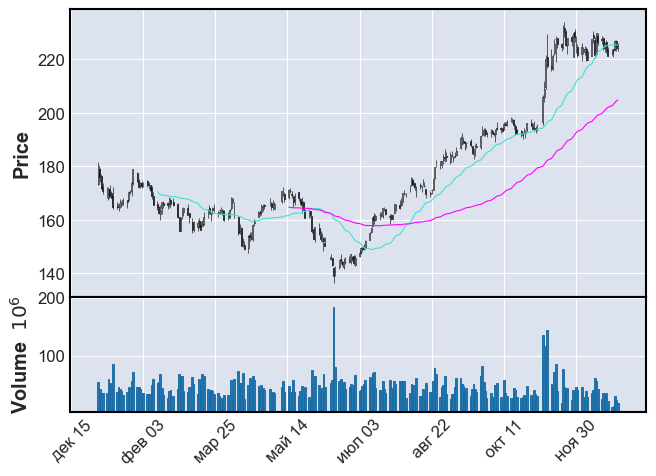

In [41]:
# conda install mplfinance
import mplfinance as mpf

sbr_mpf = sbr.copy()
sbr_mpf.columns = ['Open', 'Low', 'High', 'Close', 'Value', 'Volume', 'ma90', 'ma30',
       'one'] 

mpf.plot(sbr_mpf, type='candle',mav=(30,90), volume=True,show_nontrading=True)

In [35]:
sbr_mpf = sbr.copy()
sbr_mpf.columns

Index(['OPEN', 'LOW', 'HIGH', 'CLOSE', 'VALUE', 'VOLUME', 'ma90', 'ma30',
       'one'],
      dtype='object')

In [37]:
sbr_mpf

,Open,Low,High,Close,Value,Volume,ma90,ma30,one
TRADEDATE,,,,,,,,,
2017-01-03,173.40,173.00,181.68,180.12,9.609078e+09,53890400.0,NaN,NaN,1
2017-01-04,178.90,174.23,179.41,175.95,7.305516e+09,41400710.0,NaN,NaN,1
2017-01-05,176.31,171.54,177.28,171.90,6.109243e+09,35093040.0,NaN,NaN,1
2017-01-06,172.40,169.50,173.75,170.69,6.065098e+09,35415590.0,NaN,NaN,1
2017-01-09,171.37,168.05,172.39,168.35,5.977865e+09,35187380.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
2017-12-25,222.22,221.65,223.90,223.30,2.494221e+09,11183210.0,202.658556,225.444667,1
2017-12-26,223.90,221.00,223.98,223.57,2.738569e+09,12303590.0,203.254889,225.517000,1
2017-12-27,224.01,223.10,227.20,226.98,6.777831e+09,30101220.0,203.876889,225.551333,1


In [ ]:
# Bokeh
# https://www.youtube.com/watch?v=_8eU8BiueQM
# https://www.youtube.com/watch?v=OJNxE1FjtXU
